# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

from selenium import webdriver
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()  

'c:\\Users\\lukej\\anaconda3\\envs\\dev\\lib\\site-packages\\chromedriver_autoinstaller\\128\\chromedriver.exe'

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = BeautifulSoup(browser.html, 'html.parser')

In [100]:
# Extract all rows of data
rows_of_data = html.findAll('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
headers = html.findAll('th')
header_list = []

for i in headers:
    title = i.text
    header_list.append(title)

print(header_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [13]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
rows = html.findAll('tr', class_='data-row')
for row in rows:
    row_list.append(row.text.strip())

row_list

['2\n2012-08-16\n10\n155\n6\n-75.0\n739.0',
 '13\n2012-08-17\n11\n156\n6\n-76.0\n740.0',
 '24\n2012-08-18\n12\n156\n6\n-76.0\n741.0',
 '35\n2012-08-19\n13\n157\n6\n-74.0\n732.0',
 '46\n2012-08-20\n14\n157\n6\n-74.0\n740.0',
 '57\n2012-08-21\n15\n158\n6\n-78.0\n740.0',
 '68\n2012-08-22\n16\n158\n6\n-77.0\n740.0',
 '79\n2012-08-23\n17\n159\n6\n-76.0\n742.0',
 '112\n2012-08-27\n21\n161\n6\n-74.0\n741.0',
 '114\n2012-08-28\n22\n162\n6\n-74.0\n742.0',
 '123\n2012-08-29\n23\n162\n6\n-75.0\n741.0',
 '134\n2012-08-30\n24\n163\n6\n-75.0\n742.0',
 '145\n2012-08-31\n25\n163\n6\n-75.0\n743.0',
 '156\n2012-09-01\n26\n164\n6\n-76.0\n745.0',
 '163\n2012-09-02\n27\n164\n6\n-75.0\n743.0',
 '170\n2012-09-03\n28\n165\n6\n-75.0\n745.0',
 '171\n2012-09-04\n29\n166\n6\n-75.0\n747.0',
 '172\n2012-09-05\n30\n166\n6\n-74.0\n747.0',
 '173\n2012-09-06\n31\n167\n6\n-74.0\n745.0',
 '175\n2012-09-08\n33\n168\n6\n-73.0\n748.0',
 '176\n2012-09-10\n34\n168\n6\n-73.0\n748.0',
 '177\n2012-09-11\n35\n169\n6\n-73.0\n749.0

In [18]:
# Create an empty list
cleaned_list = []

# Loop through the scraped data to split row data into different columns & remove "\n" from result
for x in row_list:
    cleaned_list.append(x.split("\n"))
print(cleaned_list[0])

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(cleaned_list, columns=[header_list])

In [23]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64[ns]')
df[['sol', 'ls', 'month']] = df[['sol', 'ls', 'month']].astype('int')
df[['min_temp','pressure']] = df[['min_temp','pressure']].astype('float')

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [31]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
df.columns

MultiIndex([(              'id',),
            ('terrestrial_date',),
            (             'sol',),
            (              'ls',),
            (           'month',),
            (        'min_temp',),
            (        'pressure',)],
           )

In [49]:
# 1. How many months are there on Mars?
unique = df['month',].unique()
num_months = len(unique)
num_months

12

In [52]:
# 2. How many sols (Martian days) worth of data are there?
sols = df['sol',].value_counts()
martian_days = len(sols)
martian_days

1867

In [78]:
# Flatten the MultiIndex columns
df.columns = df.columns.get_level_values(0)

# Verify the new column names
print(df.columns)



Index(['index', 'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp',
       'pressure'],
      dtype='object')


In [81]:
# Group by 'month' and calculate the average of 'min_temp'
average_min_temp = df.groupby('month')['min_temp'].mean()

In [80]:
# 3. What is the average minimum temperature by month?
print(average_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


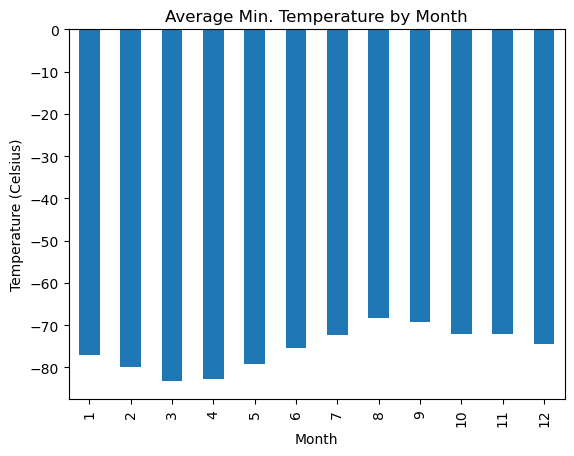

In [89]:
# Plot the average minimum temperature by month
average_min_temp.plot(kind='bar')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Month')
plt.title('Average Min. Temperature by Month')
plt.show()

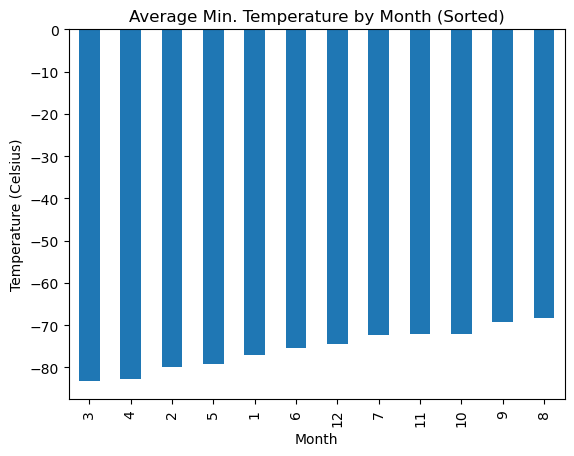

In [90]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_hottest = average_min_temp.sort_values(ascending=True)
coldest_hottest.plot(kind='bar')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Month')
plt.title('Average Min. Temperature by Month (Sorted)')
plt.show()

In [88]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby(['month'])['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

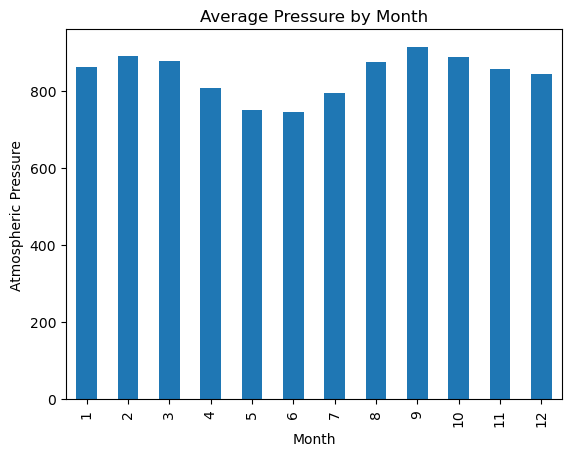

In [92]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Month')
plt.title('Average Pressure by Month')
plt.show()

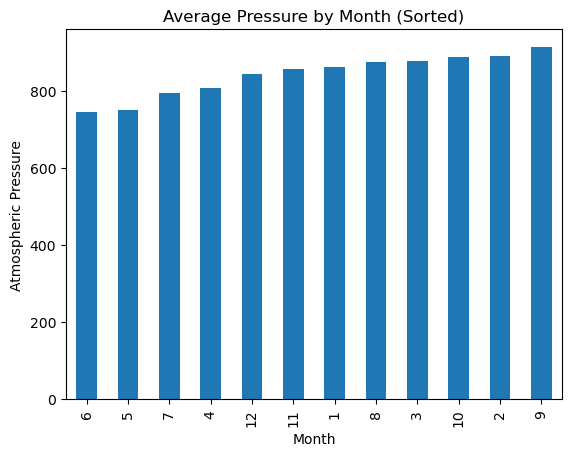

In [94]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
low_high = avg_pressure.sort_values(ascending=True)
low_high.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Month')
plt.title('Average Pressure by Month (Sorted)')
plt.show()


<Axes: xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature'>

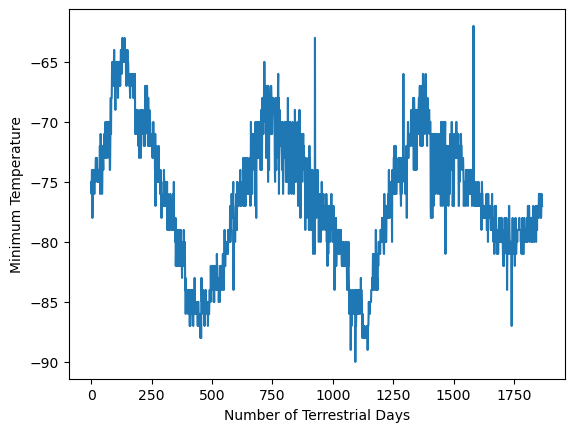

In [97]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.min_temp.plot(ylabel='Minimum Temperature', xlabel='Number of Terrestrial Days')

#### Minimum Temperature

The third month on Mars is, on average, the coldest, while the eighth month is the warmest. "Warm" being a relative term here as the average temperature is still around -70 Celsius during that time period.

#### Atmospheric Pressure

Mars' sixth month has the lowest average atmospheric pressure with the ninth month having the highest. The pressure on Mars is still less than 1% of Earth's, so you'll still need a spacesuit to do any sightseeing.

#### Year Length

According to Google, a Martian year is roughly 687 Earth days due to Mars' distance from the Sun and its slower revolution. This time frame can be seen in the daily minimum temperature graph above by looking at the number of days between the graph's peaks.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [98]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [99]:
browser.quit()